## Simulating with custom results
In this example, we'll load  a model, and simulate it, fine tuning the simulation results returned. We start as usual: 

In [1]:
from basico import *

lets load a model, i'll choose a model from the BioModels Database:

In [2]:
load_biomodel(206);

In [3]:
get_species()

,compartment,type,unit,initial_concentration,initial_particle_number,initial_expression,expression,concentration,particle_number,rate,particle_number_rate,key,sbml_id
name,,,,,,,,,,,,,
ATP,compartment,reactions,mmol/l,2.00,1.204428e+21,,,NaN,NaN,0.0,0.0,Metabolite_1,at
Triose_Gly3Phos_DHAP,compartment,reactions,mmol/l,0.60,3.613284e+20,,,NaN,NaN,0.0,0.0,Metabolite_3,s3
Acetaldehyde,compartment,reactions,mmol/l,0.08,4.817713e+19,,,NaN,NaN,0.0,0.0,Metabolite_7,s6
NAD,compartment,reactions,mmol/l,0.60,3.613284e+20,,,NaN,NaN,0.0,0.0,Metabolite_4,na
Pyruvate,compartment,reactions,mmol/l,8.00,4.817713e+21,,,NaN,NaN,0.0,0.0,Metabolite_6,s5
Glucose,compartment,reactions,mmol/l,1.00,6.022141e+20,,,NaN,NaN,0.0,0.0,Metabolite_0,s1
extracellular acetaldehyde,compartment,reactions,mmol/l,0.02,1.204428e+19,,,NaN,NaN,0.0,0.0,Metabolite_8,s6o
3PG,compartment,reactions,mmol/l,0.70,4.215499e+20,,,NaN,NaN,0.0,0.0,Metabolite_5,s4
F16P,compartment,reactions,mmol/l,5.00,3.011070e+21,,,NaN,NaN,0.0,0.0,Metabolite_2,s2


In [4]:
get_reactions()

,scheme,flux,particle_flux,function,key,sbml_id
name,,,,,,
v1,Glucose + 2 * ATP = F16P,0.0,0.0,Function for v1,Reaction_0,v1
v2,F16P = 2 * Triose_Gly3Phos_DHAP,0.0,0.0,Function for v2,Reaction_1,v2
v3,Triose_Gly3Phos_DHAP + NAD = 3PG + ATP,0.0,0.0,Function for v3,Reaction_2,v3
v4,3PG = Pyruvate + ATP,0.0,0.0,Function for v4,Reaction_3,v4
v5,Pyruvate = Acetaldehyde,0.0,0.0,Function for v5,Reaction_4,v5
v7,ATP =,0.0,0.0,Function for v7,Reaction_5,v7
v8,Triose_Gly3Phos_DHAP = NAD,0.0,0.0,Function for v8,Reaction_6,v8
v9,"""extracellular acetaldehyde"" =",0.0,0.0,Function for v9,Reaction_7,v9
v10,"Acetaldehyde = 0.1 * ""extracellular acetaldehyde""",0.0,0.0,Function for v10,Reaction_8,v10


### Simulations:

<AxesSubplot:xlabel='Time'>

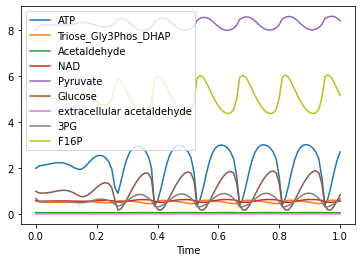

In [5]:
run_time_course(duration=1).plot()

### Custom Selection list
Sometimes you just want to select certain elements, for which you want to select the output. This can be done using `run_time_course_with_output`, where the first element is an array of display names, for which you'd like to collect the output

In [6]:
run_time_course_with_output(['Time', '[ATP]', 'ATP.Rate', '(v1).Flux'], duration=1)

,Time,[ATP],ATP.Rate,(v1).Flux
0,0.00,2.000000,23.471501,64.705882
1,0.01,2.103916,23.471501,52.477019
2,0.02,2.127439,23.471501,50.238184
3,0.03,2.147108,23.471501,49.133261
4,0.04,2.172374,23.471501,48.222173
...,...,...,...,...
96,0.96,0.700117,23.471501,58.593102
97,0.97,1.226780,23.471501,40.493568
98,0.98,1.833802,23.471501,29.080133
99,0.99,2.349971,23.471501,24.298749


as you see just, as with `run_time_course` a pandas dataframe is returned, the only difference is, that the index column is not automatically set to the time column (as you might not want to collect time!). 

<AxesSubplot:xlabel='Time'>

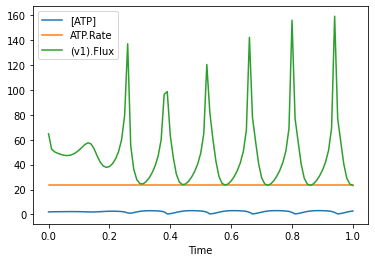

In [7]:
run_time_course_with_output(['Time', '[ATP]', 'ATP.Rate', '(v1).Flux'], duration=1).set_index('Time').plot()

The other difference, hen using this method is, that the selection is not automatically saved to COPASI, so when you prepare a model and run it later in the COPASI UI, the output selection is not persisted. You would have to create plot elements or reports for that.

### Custom Time Points
Some times you might only want to return values at certain times, this is possible as well (with either `run_time_course` and `run_time_course_with_output`, adding the 'values' argument:

In [8]:
run_time_course(values=[0, 1, 2, 4])

,ATP,Triose_Gly3Phos_DHAP,Acetaldehyde,NAD,Pyruvate,Glucose,extracellular acetaldehyde,3PG,F16P
Time,,,,,,,,,
0.0,2.000000,0.600000,0.080000,0.600000,8.000000,1.000000,0.020000,0.700000,5.000000
1.0,2.708848,0.593576,0.074087,0.579888,8.415963,0.856600,0.023069,0.672236,5.160410
2.0,3.001586,0.574146,0.078183,0.620547,8.217482,1.290106,0.024351,0.848794,4.759722
4.0,2.923411,0.508574,0.080717,0.645962,8.019722,1.851914,0.025662,0.903727,4.376452


In [9]:
run_time_course_with_output(['Time', '[ATP]', 'ATP.Rate'], values=[0, 1, 2, 4])

,Time,[ATP],ATP.Rate
0,0.0,2.000000,23.471501
1,1.0,2.708848,23.471501
2,2.0,3.001586,23.471501
3,4.0,2.923411,23.471501


### For expert users
For some elements, we do not have an easy mapping between object and display names, to help around that issue `run_time_course_with_output` allows the use of CN's as well. Though of course they are quite error prone and not as nice to read!

In [10]:
run_time_course_with_output([
    'CN=Root,Model=Wolf2000_Glycolytic_Oscillations,Reference=Time', 
    'CN=Root,Model=Wolf2000_Glycolytic_Oscillations,Vector=Compartments[compartment],Vector=Metabolites[Glucose],Reference=ParticleNumber', 
    'CN=Root,Model=Wolf2000_Glycolytic_Oscillations,Vector=Compartments[compartment],Reference=Volume'], 
    values=[0, 1, 2, 4])

,Time,Glucose.ParticleNumber,Compartments[compartment].Volume
0,0.0,6.022141e+20,1.0
1,1.0,5.158565e+20,1.0
2,2.0,7.769203e+20,1.0
3,4.0,1.115249e+21,1.0
